# Lab 6

You are tasked with evaluating card counting strategies for black jack. In order to do so, you will use object oriented programming to create a playable casino style black jack game where a computer dealer plays against $n$ computer players and possibily one human player. If you don't know the rules of blackjack or card counting, please google it. 

A few requirements:
* The game should utilize multiple 52-card decks. Typically the game is played with 6 decks.
* Players should have chips.
* Dealer's actions are predefined by rules of the game (typically hit on 16). 
* The players should be aware of all shown cards so that they can count cards.
* Each player could have a different strategy.
* The system should allow you to play large numbers of games, study the outcomes, and compare average winnings per hand rate for different strategies.

1. Begin by creating a classes to represent cards and decks. The deck should support more than one 52-card set. The deck should allow you to shuffle and draw cards. Include a "plastic" card, placed randomly in the deck. Later, when the plastic card is dealt, shuffle the cards before the next deal.

In [1]:
import random

class Card:
    def __init__(self, suit, rank):
        self.suit=suit
        self.rank=rank
        
    def __str__(self):
        return f"{self.suit} {self.rank}"
    
class Deck:
    def __init__(self, num_decks=6):
        self.num_decks=num_decks
        self.cards=[]
        self.plastic=None
        self.reset()
        
    def reset(self):
        self.cards=[]
        suits=["Hearts", "Diamonds", "Clubs", "Spades"]
        ranks=list(range(2,11)) + ["Ace", "King", "Queen", "Jack"]
        self.cards=[Card(suit,rank) for _ in range(self.num_decks) for suit in suits for rank in ranks]
        self.shuffle()
        
    def shuffle(self):
        random.shuffle(self.cards)
        self.plastic=random.randint(75, len(self.cards)-75) #plastic card randomly falls between the 75th card (min) and the last 75 cards (max)
        
    def draw(self):
        if not self.cards:
            return None
        if len(self.cards) <= self.plastic:
            self.shuffle()
        return self.cards.pop()
        
#test
deck=Deck(num_decks=6)
for i in range(150):
    print(deck.draw())

Diamonds 6
Spades 3
Diamonds 7
Hearts 7
Clubs Queen
Diamonds 4
Hearts King
Diamonds 10
Spades Queen
Diamonds King
Clubs 6
Diamonds Ace
Diamonds 2
Spades 4
Hearts 6
Clubs 9
Hearts 10
Spades 6
Hearts 5
Spades 2
Spades 2
Clubs Ace
Hearts 10
Hearts Queen
Hearts 8
Clubs 2
Hearts 4
Diamonds King
Spades Jack
Clubs 7
Spades Jack
Hearts 9
Spades 8
Diamonds 6
Hearts 2
Spades Ace
Spades 10
Diamonds 4
Diamonds 5
Spades Ace
Diamonds Jack
Diamonds Queen
Clubs 10
Clubs 8
Clubs 4
Hearts Jack
Hearts 3
Diamonds 3
Spades 10
Spades King
Clubs 10
Hearts 6
Diamonds 10
Clubs 3
Hearts 8
Hearts King
Clubs 7
Clubs 4
Diamonds Jack
Diamonds 4
Clubs Ace
Spades Jack
Diamonds 8
Clubs King
Clubs 9
Clubs Jack
Diamonds 3
Diamonds 9
Hearts Jack
Diamonds 3
Spades 3
Hearts Ace
Hearts 7
Spades 5
Spades 7
Spades 9
Spades 2
Diamonds King
Hearts 6
Hearts 9
Spades Queen
Spades 2
Clubs Ace
Spades 8
Hearts 9
Diamonds Ace
Clubs 5
Hearts 2
Diamonds 2
Clubs Queen
Diamonds King
Clubs Jack
Clubs Queen
Hearts Jack
Diamonds Queen
Heart

2. Now design your game on a UML diagram. You may want to create classes to represent, players, a hand, and/or the game. As you work through the lab, update your UML diagram. At the end of the lab, submit your diagram (as pdf file) along with your notebook. 

In [2]:
class Player:
    
class Dealer:
    
class Play_Blackjack:
    
#classes made, UML design uploaded, skeleton in next question!

IndentationError: expected an indented block after class definition on line 1 (2018346794.py, line 3)

3. Begin with implementing the skeleton (ie define data members and methods/functions, but do not code the logic) of the classes in your UML diagram.

In [3]:
class Player:
    def __init__(self, name, chips):
        
    def hand(self, card):
        
class Dealer:
    def __init__(self):
        
    def hand(self, card)
    
class Play_Blackjack:
    def __init__(self, num_players):
        
    def play_round(self):
        

IndentationError: expected an indented block after function definition on line 2 (1479826754.py, line 4)

4. Complete the implementation by coding the logic of all functions. For now, just implement the dealer player and human player.

In [4]:
import random

class Card:
    def __init__(self, suit, rank):
        self.suit=suit
        self.rank=rank
        
    def __str__(self):
        return f"{self.suit} {self.rank}"
    
class Deck:
    def __init__(self, num_decks=6):
        self.num_decks=num_decks
        self.cards=[]
        self.plastic=None
        self.reset()
        
    def reset(self):
        self.cards=[]
        suits=["Hearts", "Diamonds", "Clubs", "Spades"]
        ranks=list(range(2,11)) + ["Ace", "King", "Queen", "Jack"]
        self.cards=[Card(suit,rank) for _ in range(self.num_decks) for suit in suits for rank in ranks]
        self.shuffle()
        
    def shuffle(self):
        random.shuffle(self.cards)
        self.plastic=random.randint(75, len(self.cards)-75) #plastic card randomly falls between the 75th card (min) and the last 75 cards (max)
        
    def draw(self):
        if not self.cards:
            return None
        if len(self.cards) <= self.plastic:
            self.shuffle()
        return self.cards.pop()




class Player: #human player settings!
    def __init__(self, name, chips=100):
        self.name=name
        self.chips=chips
        self.hand=[]
        
    def add_card(self, card):
        self.hand.append(card)
        
    def clear_hand(self):
        self.hand=[]
        
    def hand_value(self):
        value=0
        num_aces=0
        
        for card in self.hand:
            if card.rank in ["King", "Queen", "Jack"]: #face cards have value of 10
                value+=10
            elif card.rank=="Ace":
                num_aces+=1
            else:
                value+=int(card.rank) #returns numerical value of card
        for _ in range(num_aces): #special handle on ace
            if value+11<=21: #if less than a bust (over 21) add the value
                value+=11 #if adding 11 results in a bust, add 1 to value
            else:
                value+=1
        return value #returns total value of hand
        
class Dealer(Player):
    def __init__(self):
        super().__init__("Dealer")
        
    def show_hand(self, reveal=False): 
         if not reveal:
            print(f"Dealer's hand: {self.hand[0]}") #only show first card
        
         else: #reveals hidden (hole card)
            print(f"Dealer's hand:")
            for card in self.hand:
                print(card)
            
#test
dealer=Dealer()
deck=Deck()

dealer.add_card(deck.draw())
dealer.add_card(deck.draw())
dealer.show_hand()
#dealer.reveal_hand()

Dealer's hand: Diamonds King


5.  Test. Demonstrate game play. For example, create a game of several dealer players and show that the game is functional through several rounds.

In [5]:
class Play_Blackjack:
    def play_round(deck, players): #deals intial cards
        for _ in range(2):
            for player in players:
                player.add_card(deck.draw())
            dealer.add_card(deck.draw())
            
        dealer.show_hand() #Shows dealer hands
         #shows player's hands (print player's name, cards in their hand (as a string), total value of hand)
        for player in players:
            print(f"{player.name}'s hand: {', '.join(map(str, player.hand))}, value: {player.hand_value()}")
        
        for player in players: #Hit if hand value under 17
            while player.hand_value()<17:
                player.add_card(deck.draw())
            print(f"{player.name} finished playing.")
            
        while dealer.hand_value()<17: #Hit if hand value under 17
            dealer.add_card(deck.draw())
        dealer.show_hand(reveal=True)
        
        #Winner rules
        dealer_value=dealer.hand_value()
        for player in players:
            player_value=player.hand_value()
            if player_value>21:
                print(f"{player.name} has busted. Dealer wins!")
            elif dealer_value>21:
                print(f"Dealer has busted. Players win!")
            elif player_value>dealer_value:
                print(f"{player.name} wins!")
            elif player_value<dealer_value:
                print(f"Dealer wins!")
            else:
                print(f"{player.name} and Dealer tie")
                
        #set up next round/clear hands
        for player in players:
            player.clear_hand()
        dealer.clear_hand()
        
        
#players
players=[Player(f"Player {i+1}") for i in range(3)]
dealer=Dealer()
    
#test game
num_rounds=5
deck=Deck()
for round_num in range(1, num_rounds+1):
    print(f"\nRound {round_num}:\n")
    Play_Blackjack.play_round(deck, players)
    
#problems: does not show dealer total value; 
#does not show next card dealt when players/dealer bust; 
#fix player names in win message


Round 1:

Dealer's hand: Hearts Queen
Player 1's hand: Diamonds 5, Spades 4, value: 9
Player 2's hand: Spades Jack, Clubs 4, value: 14
Player 3's hand: Clubs King, Spades 9, value: 19
Player 1 finished playing.
Player 2 finished playing.
Player 3 finished playing.
Dealer's hand:
Hearts Queen
Clubs 5
Spades 5
Dealer wins!
Dealer wins!
Dealer wins!

Round 2:

Dealer's hand: Clubs 4
Player 1's hand: Clubs Jack, Spades 5, value: 15
Player 2's hand: Clubs 3, Spades 5, value: 8
Player 3's hand: Diamonds 3, Hearts 8, value: 11
Player 1 finished playing.
Player 2 finished playing.
Player 3 finished playing.
Dealer's hand:
Clubs 4
Hearts Ace
Clubs 5
Player 1 has busted. Dealer wins!
Player 2 has busted. Dealer wins!
Dealer wins!

Round 3:

Dealer's hand: Clubs Queen
Player 1's hand: Clubs 9, Diamonds 9, value: 18
Player 2's hand: Spades Ace, Hearts Ace, value: 12
Player 3's hand: Clubs 5, Spades 10, value: 15
Player 1 finished playing.
Player 2 finished playing.
Player 3 finished playing.
Deal

6. Implement a new player with the following strategy:

    * Assign each card a value: 
        * Cards 2 to 6 are +1 
        * Cards 7 to 9 are 0 
        * Cards 10 through Ace are -1
    * Compute the sum of the values for all cards seen so far.
    * Hit if sum is very negative, stay if sum is very positive. Select a threshold for hit/stay, e.g. 0 or -2.  

In [6]:
#Player Xtreme the card counting player
class PlayerX(Player):
    def __init__(self, name, chips=100, hit_threshold=0):
        super().__init__(name, chips)
        self.card_values=0
        self.hit_threshold=hit_threshold
        
    def add_card(self, card):
        super().add_card(card)
        self.update_cardval(card)
        
    def update_cardval(self, card):
        if card.rank in range(2, 7): #should be cards 2-6
            self.card_values+=1
        elif card.rank in ["10", "Jack", "Queen", "King", "Ace"]:
            self.card_values-=1
        else:
            card.rank in range(7,10): #should be cards 7-9
                self.card_values+=0
                
    def hit(self): #hit if card value is below hit threshold
        return self.card_values<self.hit_threshold
    
    def play(self, deck):
        while self.hit():
            card=deck.draw()
            if card:
                self.add_card(card)
            else:
                break
        

SyntaxError: invalid syntax (26740528.py, line 18)

7. Create a test scenario where one player, using the above strategy, is playing with a dealer and 3 other players that follow the dealer's strategy. Each player starts with same number of chips. Play 50 rounds (or until the strategy player is out of money). Compute the strategy player's winnings. You may remove unnecessary printouts from your code (perhaps implement a verbose/quiet mode) to reduce the output.

In [7]:
import random

class Card:
    def __init__(self, suit, rank):
        self.suit=suit
        self.rank=rank
        
    def __str__(self):
        return f"{self.suit} {self.rank}"
    
class Deck:
    def __init__(self, num_decks=6):
        self.num_decks=num_decks
        self.cards=[]
        self.plastic=None
        self.reset()
        
    def reset(self):
        self.cards=[]
        suits=["Hearts", "Diamonds", "Clubs", "Spades"]
        ranks=list(range(2,11)) + ["Ace", "King", "Queen", "Jack"]
        self.cards=[Card(suit,rank) for _ in range(self.num_decks) for suit in suits for rank in ranks]
        self.shuffle()
        
    def shuffle(self):
        random.shuffle(self.cards)
        max_range=max(26,len(self.cards)-26)
        self.plastic=random.randint(26, max_range) #plastic card randomly falls between the 26th card (min) and the last 26 cards (max)
    
        
    def draw(self):
        if not self.cards:
            self.reset() #reshuffle deck when no cards are left
        if len(self.cards) <= self.plastic:
            self.shuffle() #reshuffle if draw plastic card
        return self.cards.pop()

class Player: #human player settings!
    def __init__(self, name, chips=100):
        self.name=name
        self.chips=chips
        self.hand=[]
        self.bet=min(chips, 20) #automatic bet of 20 chips or rest of chips if they are below 20 chips
        
    def add_card(self, card):
        self.hand.append(card)
        
    def clear_hand(self):
        self.hand=[]
        
    def hand_value(self):
        value=0
        num_aces=0
        
        for card in self.hand:
            if card.rank in ["King", "Queen", "Jack"]: #face cards have value of 10
                value+=10
            elif card.rank=="Ace":
                num_aces+=1
            else:
                value+=int(card.rank) #returns numerical value of card
        for _ in range(num_aces): #special handle on ace
            if value+11<=21: #if less than a bust (over 21) add the value
                value+=11 #if adding 11 results in a bust, add 1 to value
            else:
                value+=1
        return value #returns total value of hand
    
    def place_bet(self):
        self.chips-=self.bet
        
    def win_bet(self):
        self.chips+=2*self.bet #earn double the bet amount
            
    def lose_bet(self):
        self.chips=self.chips
        
class Dealer(Player):
    def __init__(self):
        super().__init__("Dealer")
        
    def show_hand(self, reveal=False): 
         if not reveal:
            print(f"Dealer's hand: {self.hand[0]}") #only show first card
        
         else: #reveals hidden (hole card)
            print(f"Dealer's hand:")
            for card in self.hand:
                print(card)

#---------------------------------------------------------------

#Player Xtreme the card counting player
class PlayerX(Player):
    def __init__(self, name, chips=100, hit_threshold=-2):
        super().__init__(name, chips)
        self.card_values=0
        self.hit_threshold=hit_threshold
        
    def add_card(self, card):
        super().add_card(card)
        self.update_cardval(card)
        
    def update_cardval(self, card):
        if card.rank in range(2, 7): #should be cards 2-6
            self.card_values+=1
        elif card.rank in ["10", "Jack", "Queen", "King", "Ace"]:
            self.card_values-=1
        elif card.rank in range(7, 10): #should be cards 7-9
            self.card_values+=0
                
    def hit(self): #hit if card value is below hit threshold
        return self.card_values<self.hit_threshold
    
    def play(self, deck):
        while self.hit():
            card=deck.draw()
            if card:
                self.add_card(card)
            else:
                break   

#-----------------------------------------------------------------                

class Play_Blackjack:
    def play_round(deck, players, dealer, verbose=False): #added dealer into attributes
        #deal intial card set
        for _ in range(2):
            for player in players:
                player.add_card(deck.draw())
            dealer.add_card(deck.draw())
            
        if verbose:
            dealer.show_hand() #Shows dealer hands
        
        #place bets
        for player in players:
            player.place_bet()
        
#shows player's hands (print player's name, cards in their hand (as a string), total value of hand)
        if verbose:
           for player in players:
                print(f"{player.name}'s hand: {', '.join(map(str, player.hand))}, value: {player.hand_value()}")
        
        for player in players: #Hit if hand value under 17
            while player.hand_value()<17:
                card=deck.draw()
                if card:
                    player.add_card(card)
                    if verbose:
                        print(f"{player.name} hits and received {card}.")
                else:
                    break
            if verbose:
                print(f"{player.name} finishes playing.")
            
        while dealer.hand_value()<17: #Hit if hand value under 17
            card=deck.draw()
            if card:
                dealer.add_card(card)
                if verbose:
                    print(f"Dealer hits and received {card}.")
            else:
                break
            if verbose:
                dealer.show_hand(reveal=True)
        
        #Winner rules
        dealer_value=dealer.hand_value()
        for player in players:
            player_value=player.hand_value()
            if player.name=="PlayerX":
                print(f"PlayerX's current chips: {player.chips}")
                print(f"PlayerX's bet: {player.bet}")
            if player_value>21:
                print(f"{player.name} has busted. Dealer wins!")
                player.lose_bet()
            elif dealer_value>21:
                print(f"Dealer has busted. {player.name} wins!")
                player.win_bet()
            elif player_value>dealer_value:
                print(f"{player.name} wins!")
                player.win_bet()
            elif player_value<dealer_value:
                print(f"{player.name} has lost. Dealer wins!")
                player.lose_bet()
            else:
                print(f"{player.name} and Dealer tie.")
                
        #set up next round/clear hands
        for player in players:
            player.clear_hand()
        dealer.clear_hand()
        
    def play_game():
        player_chips=100
        
        #players
        players=[Player(f"Player {i+1}", chips=player_chips) for i in range(3)]
        dealer=Dealer()
        strat_player=PlayerX("PlayerX", chips=player_chips, hit_threshold=-2)
        
        #initialize game
        num_rounds=50
        player_chips=100
        deck=Deck()
        
        for round_num in range(1, num_rounds+1):
            print(f"\nRound {round_num}:\n")
            Play_Blackjack.play_round(deck, [strat_player]+players, dealer)
            if strat_player.chips<=0:
                break
                
        #compute strategy players' winnings       
        print(f"Strategy Player's Winnings: {strat_player.chips-player_chips}")
        
Play_Blackjack.play_game()

#problems: strategy player's winnings came out as zero--don't have a chip gain/lose system set up! (lol)
#problem above solved in player and player_blackjack class by adding bet methods


Round 1:

PlayerX's current chips: 80
PlayerX's bet: 20
Dealer has busted. PlayerX wins!
Player 1 has busted. Dealer wins!
Dealer has busted. Player 2 wins!
Player 3 has busted. Dealer wins!

Round 2:

PlayerX's current chips: 100
PlayerX's bet: 20
PlayerX has busted. Dealer wins!
Player 1 wins!
Player 2 has busted. Dealer wins!
Player 3 has busted. Dealer wins!

Round 3:

PlayerX's current chips: 80
PlayerX's bet: 20
PlayerX has busted. Dealer wins!
Player 1 has busted. Dealer wins!
Player 2 has lost. Dealer wins!
Player 3 has busted. Dealer wins!

Round 4:

PlayerX's current chips: 60
PlayerX's bet: 20
PlayerX has lost. Dealer wins!
Player 1 has busted. Dealer wins!
Player 2 has busted. Dealer wins!
Player 3 has busted. Dealer wins!

Round 5:

PlayerX's current chips: 40
PlayerX's bet: 20
PlayerX and Dealer tie.
Player 1 has lost. Dealer wins!
Player 2 has lost. Dealer wins!
Player 3 has lost. Dealer wins!

Round 6:

PlayerX's current chips: 20
PlayerX's bet: 20
PlayerX and Dealer t

8. Create a loop that runs 100 games of 50 rounds, as setup in previous question, and store the strategy player's chips at the end of the game (aka "winnings") in a list. Histogram the winnings. What is the average winnings per round? What is the standard deviation. What is the probabilty of net winning or lossing after 50 rounds?


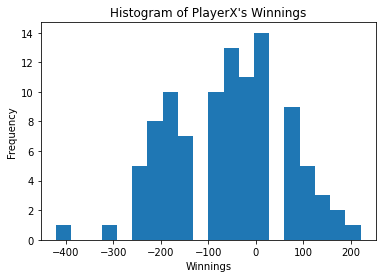

Average winnings per round: -0.01248
Standard deviation of winnings: 121.43409735325577


In [14]:
import numpy as np
import matplotlib.pyplot as plt

class StatSum:
    def calculate(player_winnings, num_rounds, num_games):
        #histogram of PlayerX's winnings
        plt.hist(player_winnings, bins=20)
        plt.xlabel("Winnings")
        plt.ylabel("Frequency")
        plt.title("Histogram of PlayerX's Winnings")
        plt.show()
        
        #average winnings per round
        avg_rwins=np.mean(player_winnings)/(num_rounds*num_games)
        print(f"Average winnings per round: {avg_rwins}")
        
        #standard deviation
        std=np.std(player_winnings)
        print(f"Standard deviation of winnings: {std}")
        
        #probability of net win/lose
        #prob_net_win=
        #prob_net_loss=
        

#---------------------------------------------------------------------------------------

class Play_Blackjack:
    def play_round(deck, players, dealer, verbose=False): #added dealer into attributes
        #deal intial card set
        for _ in range(2):
            for player in players:
                player.add_card(deck.draw())
            dealer.add_card(deck.draw())
            
        #if verbose:
            #dealer.show_hand() #Shows dealer hands
        
        #place bets
        for player in players:
            player.place_bet()
            
        #shows player's hands (print player's name, cards in their hand (as a string), total value of hand)
        #if verbose:
        #for player in players:
            #print(f"{player.name}'s hand: {', '.join(map(str, player.hand))}, value: {player.hand_value()}")
        
        for player in players: #Hit if hand value under 17
            while player.hand_value()<17:
                card=deck.draw()
                if card:
                    player.add_card(card)
                    #if verbose:
                        #print(f"{player.name} hits and received {card}.")
                else:
                    break
            #if verbose:
                #print(f"{player.name} finishes playing.")
            
        while dealer.hand_value()<17: #Hit if hand value under 17
            card=deck.draw()
            if card:
                dealer.add_card(card)
                #if verbose:
                    #print(f"Dealer hits and received {card}.")
            else:
                break
            #if verbose:
                #dealer.show_hand(reveal=True)
        
        #Winner rules
        dealer_value=dealer.hand_value()
        for player in players:
            player_value=player.hand_value()
            #if player.name=="PlayerX":
                #print(f"PlayerX's current chips: {player.chips}")
                #print(f"PlayerX's bet: {player.bet}")
            if player_value>21:
                #print(f"{player.name} has busted. Dealer wins!")
                player.lose_bet()
            elif dealer_value>21:
                #print(f"Dealer has busted. {player.name} wins!")
                player.win_bet()
            elif player_value>dealer_value:
                #print(f"{player.name} wins!")
                player.win_bet()
            elif player_value<dealer_value:
                #print(f"{player.name} has lost. Dealer wins!")
                player.lose_bet()
            #else:
                #print(f"{player.name} and Dealer tie.")
                
        #set up next round/clear hands
        for player in players:
            player.clear_hand()
        dealer.clear_hand()
        
    def play_game():
        player_chips=100
        
        
        #initialize game
        player_winnings=[]
        num_games=100
        num_rounds=50
        deck=Deck()
        
        for _ in range(num_games):
            #players
            players=[Player(f"Player {i+1}", chips=player_chips) for i in range(3)]
            dealer=Dealer()
            strat_player=PlayerX("PlayerX", chips=player_chips, hit_threshold=-2)

            for _ in range(num_rounds):
                Play_Blackjack.play_round(deck, [strat_player]+players, dealer)
            
            #store strat players winnings
            player_winnings.append(strat_player.chips)
            
        StatSum.calculate(player_winnings, num_rounds, num_games)
        #compute strategy players' winnings       
        #print(f"Strategy Player's Winnings: {strat_player.chips-player_chips}")
        
Play_Blackjack.play_game()

9. Repeat previous questions scanning the value of the threshold. Try at least 5 different threshold values. Can you find an optimal value?


Threshold: -5


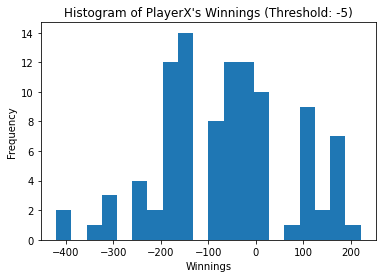

Average winnings per round: -1.304
Standard deviation of winnings: 137.24780508263146

Threshold: -4


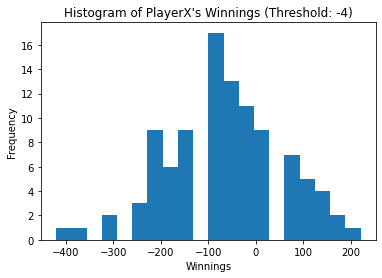

Average winnings per round: -1.392
Standard deviation of winnings: 123.17402323542086

Threshold: -3


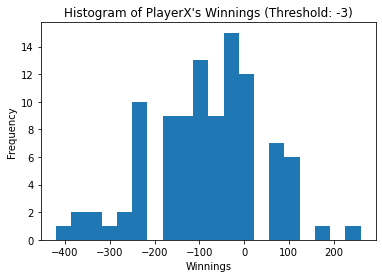

Average winnings per round: -1.64
Standard deviation of winnings: 124.88394612599332

Threshold: -2


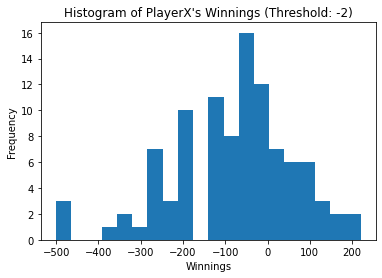

Average winnings per round: -1.672
Standard deviation of winnings: 145.66756674016355

Threshold: -1


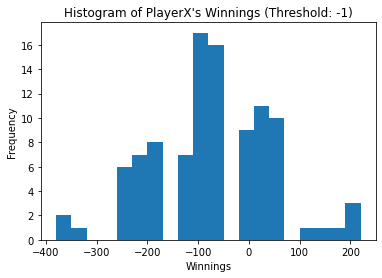

Average winnings per round: -1.5119999999999998
Standard deviation of winnings: 120.51821439102056

Threshold: 0


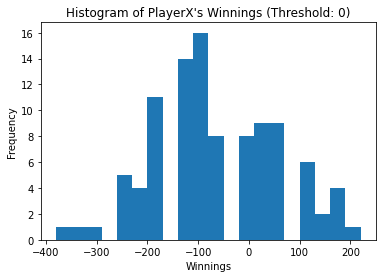

Average winnings per round: -1.368
Standard deviation of winnings: 124.48871434792794

Threshold: 1


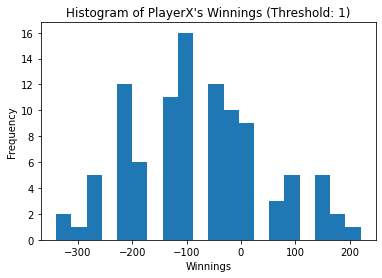

Average winnings per round: -1.584
Standard deviation of winnings: 122.7002852482422

Threshold: 2


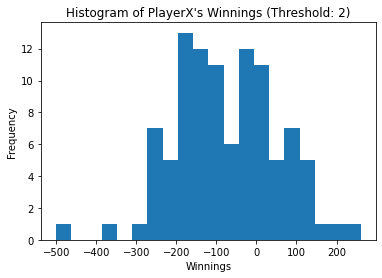

Average winnings per round: -1.4480000000000002
Standard deviation of winnings: 134.42559280137098

Threshold: 3


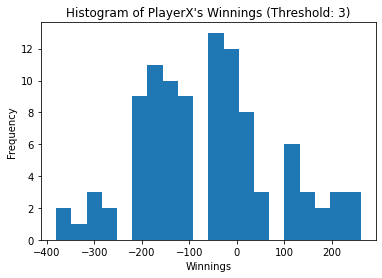

Average winnings per round: -1.328
Standard deviation of winnings: 142.96517058360752

Threshold: 4


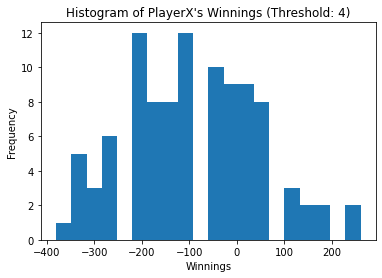

Average winnings per round: -1.92
Standard deviation of winnings: 139.08270920570968

Threshold: 5


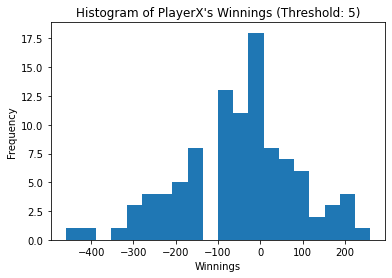

Average winnings per round: -1.048
Standard deviation of winnings: 139.44977590516237

Threshold: 6


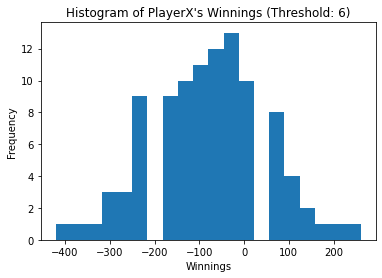

Average winnings per round: -1.5759999999999998
Standard deviation of winnings: 127.68147868817935


In [22]:
import numpy as np
import matplotlib.pyplot as plt

thresholds=[-5,-4,-3,-2,-1,0,1,2,3,4,5,6]

class StatSum:
    def calculate(player_winnings, num_rounds, thresholds):
        #histogram of PlayerX's winnings
        for threshold in thresholds:
            threshold_winnings=player_winnings[threshold]
            print(f"\nThreshold: {threshold}")
            plt.hist(threshold_winnings, bins=20)
            plt.xlabel("Winnings")
            plt.ylabel("Frequency")
            plt.title(f"Histogram of PlayerX's Winnings (Threshold: {threshold})")
            plt.show()
        
            #average winnings per round
            avg_rwins=np.mean(threshold_winnings)/(num_rounds)
            print(f"Average winnings per round: {avg_rwins}")
        
            #standard deviation
            std=np.std(threshold_winnings)
            print(f"Standard deviation of winnings: {std}")
        
            #probability of net win/lose
            #prob_net_win=
            #prob_net_loss=
        

#---------------------------------------------------------------------------------------

class Play_Blackjack:
    def play_round(deck, players, dealer, verbose=False): #added dealer into attributes
        #deal intial card set
        for _ in range(2):
            for player in players:
                player.add_card(deck.draw())
            dealer.add_card(deck.draw())
            
        #if verbose:
            #dealer.show_hand() #Shows dealer hands
        
        #place bets
        for player in players:
            player.place_bet()
            
        #shows player's hands (print player's name, cards in their hand (as a string), total value of hand)
        #if verbose:
        #for player in players:
            #print(f"{player.name}'s hand: {', '.join(map(str, player.hand))}, value: {player.hand_value()}")
        
        for player in players: #Hit if hand value under 17
            while player.hand_value()<17:
                card=deck.draw()
                if card:
                    player.add_card(card)
                    #if verbose:
                        #print(f"{player.name} hits and received {card}.")
                else:
                    break
            #if verbose:
                #print(f"{player.name} finishes playing.")
            
        while dealer.hand_value()<17: #Hit if hand value under 17
            card=deck.draw()
            if card:
                dealer.add_card(card)
                #if verbose:
                    #print(f"Dealer hits and received {card}.")
            else:
                break
            #if verbose:
                #dealer.show_hand(reveal=True)
        
        #Winner rules
        dealer_value=dealer.hand_value()
        for player in players:
            player_value=player.hand_value()
            #if player.name=="PlayerX":
                #print(f"PlayerX's current chips: {player.chips}")
                #print(f"PlayerX's bet: {player.bet}")
            if player_value>21:
                #print(f"{player.name} has busted. Dealer wins!")
                player.lose_bet()
            elif dealer_value>21:
                #print(f"Dealer has busted. {player.name} wins!")
                player.win_bet()
            elif player_value>dealer_value:
                #print(f"{player.name} wins!")
                player.win_bet()
            elif player_value<dealer_value:
                #print(f"{player.name} has lost. Dealer wins!")
                player.lose_bet()
            #else:
                #print(f"{player.name} and Dealer tie.")
                
        #set up next round/clear hands
        for player in players:
            player.clear_hand()
        dealer.clear_hand()
        
    def play_game(thresholds):
        player_chips=100
        
        
        #initialize game
        player_winnings={threshold:[] for threshold in thresholds}
        num_games=100
        num_rounds=50
        deck=Deck()
        
        for threshold in thresholds:
            for _ in range(num_games):
                #players
                players=[Player(f"Player {i+1}", chips=player_chips) for i in range(3)]
                dealer=Dealer()
                strat_player=PlayerX("PlayerX", chips=player_chips, hit_threshold=threshold)

                for _ in range(num_rounds):
                    Play_Blackjack.play_round(deck, [strat_player]+players, dealer)
            
                #store strat players winnings for current threshold
                player_winnings[threshold].append(strat_player.chips)
            
        StatSum.calculate(player_winnings, num_rounds, thresholds)
        #compute strategy players' winnings       
        #print(f"Strategy Player's Winnings: {strat_player.chips-player_chips}")
        
Play_Blackjack.play_game(thresholds)

10. Create a new strategy based on web searches or your own ideas. Demonstrate that the new strategy will result in increased or decreased winnings. 

Player: 1
Average winnings per round: -17.36
Standard deviation of winnings: 136.24155019670027


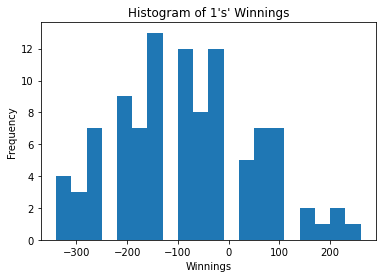

Player: 2
Average winnings per round: -18.16
Standard deviation of winnings: 143.09213814881656


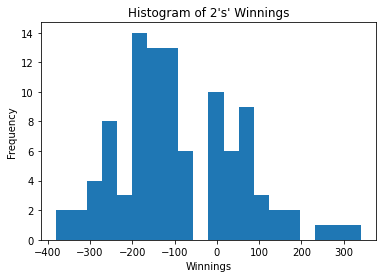

Player: 3
Average winnings per round: -11.36
Standard deviation of winnings: 138.75791869295242


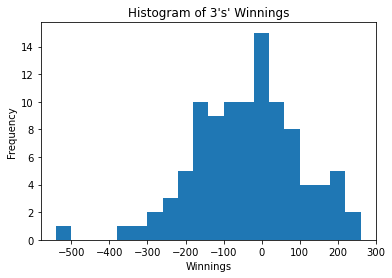

Player: 4
Average winnings per round: -34.160000000000004
Standard deviation of winnings: 130.45826918980643


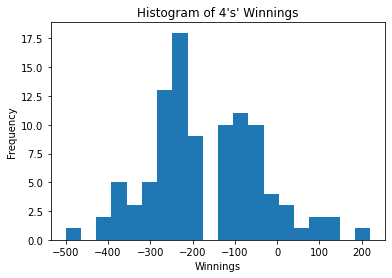

In [37]:
#see how the AI players are doing with the basic strat (hit unless hand value is under 17)

class Player: #human player settings!
    def __init__(self, name, chips=100):
        self.name=name
        self.chips=chips
        self.hand=[]
        self.bet=min(chips, 20) #automatic bet of 20 chips or rest of chips if they are below 20 chips
        
    def add_card(self, card):
        self.hand.append(card)
        
    def clear_hand(self):
        self.hand=[]
        
    def hand_value(self):
        value=0
        num_aces=0
        
        for card in self.hand:
            if card.rank in ["King", "Queen", "Jack"]: #face cards have value of 10
                value+=10
            elif card.rank=="Ace":
                num_aces+=1
            else:
                value+=int(card.rank) #returns numerical value of card
        for _ in range(num_aces): #special handle on ace
            if value+11<=21: #if less than a bust (over 21) add the value
                value+=11 #if adding 11 results in a bust, add 1 to value
            else:
                value+=1
        return value #returns total value of hand
    
    def place_bet(self):
        self.chips-=self.bet
        
    def win_bet(self):
        self.chips+=2*self.bet #earn double the bet amount
            
    def lose_bet(self):
        self.chips=self.chips
        
#---------------------------------------------------------------------------        
        
class Dealer(Player):
    def __init__(self):
        super().__init__("Dealer")
        
    def show_hand(self, reveal=False): 
         if not reveal:
            print(f"Dealer's hand: {self.hand[0]}") #only show first card
        
         else: #reveals hidden (hole card)
            print(f"Dealer's hand:")
            for card in self.hand:
                print(card)
                
#--------------------------------------------------------------------------

class BasePlayer(Player):
    def play(self, deck):
        while self.hand_value()<17:
            self.add_card(deck.draw())

#---------------------------------------------------------------

#Player Xtreme the card counting player
class PlayerX(Player):
    def __init__(self, name, chips=100, hit_threshold=-2):
        super().__init__(name, chips)
        self.card_values=0
        self.hit_threshold=hit_threshold
        
    def add_card(self, card):
        super().add_card(card)
        self.update_cardval(card)
        
    def update_cardval(self, card):
        if card.rank in range(2, 7): #should be cards 2-6
            self.card_values+=1
        elif card.rank in ["10", "Jack", "Queen", "King", "Ace"]:
            self.card_values-=1
        elif card.rank in range(7, 10): #should be cards 7-9
            self.card_values+=0
                
    def hit(self): #hit if card value is below hit threshold
        return self.card_values<self.hit_threshold
    
    def play(self, deck):
        while self.hit():
            card=deck.draw()
            if card:
                self.add_card(card)
            else:
                break
                
#----------------------------------------------------------------------------------------

class StatSum:
    def calculate(player_winnings):
        #histogram of all player's winnings
        for i, winnings in enumerate(player_winnings):
            
            print(f"Player: {i+1}")
            #average winnings per round
            avg_rwins=np.mean(winnings)/(num_rounds)
            print(f"Average winnings per round: {avg_rwins}")
            
            #standard deviation
            std=np.std(winnings)
            print(f"Standard deviation of winnings: {std}")

            
            plt.hist(winnings, bins=20)
            plt.xlabel("Winnings")
            plt.ylabel("Frequency")
            plt.title(f"Histogram of {i+1}'s' Winnings")
            plt.show()
        
            #probability of net win/lose
            #prob_net_win=
            #prob_net_loss=
            
#-------------------------------------------------------------------------------
    
class Play_Blackjack:
    def play_round(deck, players, dealer, verbose=False): #added dealer into attributes
        #deal intial card set
        for _ in range(2):
            for player in players:
                player.add_card(deck.draw())
            dealer.add_card(deck.draw())
            
        #if verbose:
            #dealer.show_hand() #Shows dealer hands
        
        #place bets
        for player in players:
            player.place_bet()
            
        #shows player's hands (print player's name, cards in their hand (as a string), total value of hand)
        #if verbose:
        #for player in players:
            #print(f"{player.name}'s hand: {', '.join(map(str, player.hand))}, value: {player.hand_value()}")
        
        for player in players: #Hit if hand value under 17
            player.play(deck)
            
        while dealer.hand_value()<17: #Hit if hand value under 17
            card=deck.draw()
            if card:
                dealer.add_card(card)
        
        #Winner rules
        dealer_value=dealer.hand_value()
        for player in players:
            player_value=player.hand_value()
            if player_value>21:
                player.lose_bet()
            elif dealer_value>21:
                player.win_bet()
            elif player_value>dealer_value:
                player.win_bet()
            elif player_value<dealer_value:
                player.lose_bet()
                
        #set up next round/clear hands
        for player in players:
            player.clear_hand()
        dealer.clear_hand()
        
    def play_game(num_games=100, num_rounds=50):
        player_chips=100
        player_winnings=[[] for _ in range(4)]
        
        deck=Deck()
        
        for _ in range(num_games):
            #players
            players=[BasePlayer(f"Player {i+1}", chips=player_chips) for i in range(3)]
            dealer=Dealer()
            strat_player=PlayerX("PlayerX", chips=player_chips)

            for _ in range(num_rounds):
                Play_Blackjack.play_round(deck, [strat_player]+players, dealer)
            
            #store player's winnings
            total_winnings=[player.chips for player in players]+[strat_player.chips]
            for i, winnings in enumerate(total_winnings):
                player_winnings[i].append(winnings)
            
        StatSum.calculate(player_winnings)
        
Play_Blackjack.play_game()